# Capstone Project

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price. The objective is to analyse the various paramters and predict house prices.

# Importing Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix

# Exporting Data File

In [2]:
house= pd.read_csv("innercity.csv") #Loading Data File

In [3]:
house.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [4]:
def details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum() #Finding Null Values
    b['Data Type'] = df.dtypes
    b['No. of Unique Values'] = df.nunique()# Finding Unique Values
    return b

In [5]:
details(house)

Null Values Data Type  No. of Unique Values
cid                         0     int64                 21436
dayhours                    0    object                   372
price                       0     int64                  3625
room_bed                    0     int64                    13
room_bath                   0   float64                    30
living_measure              0     int64                  1038
lot_measure                 0     int64                  9782
ceil                        0   float64                     6
coast                       0     int64                     2
sight                       0     int64                     5
condition                   0     int64                     5
quality                     0     int64                    12
ceil_measure                0     int64                   946
basement                    0     int64                   306
yr_built                    0     int64                   116
yr_renovated                0     int64                    70
zipcode                     0     int64                    70
lat                         0   float64                  5034
long                        0   float64                   752
living_measure15            0     int64                   777
lot_measure15               0     int64                  8689
furnished                   0     int64                     2
total_area                  0     int64                 11163

In [6]:
house.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [7]:
house.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

In [8]:
house.shape

(21613, 23)

In [9]:
house.corr()['price']

cid                -0.016797
price               1.000000
room_bed            0.308338
room_bath           0.525134
living_measure      0.702044
lot_measure         0.089655
ceil                0.256786
coast               0.266331
sight               0.397346
condition           0.036392
quality             0.667463
ceil_measure        0.605566
basement            0.323837
yr_built            0.053982
yr_renovated        0.126442
zipcode            -0.053168
lat                 0.306919
long                0.021571
living_measure15    0.585374
lot_measure15       0.082456
furnished           0.565991
total_area          0.104796
Name: price, dtype: float64

# Exploratory Data Analysis

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

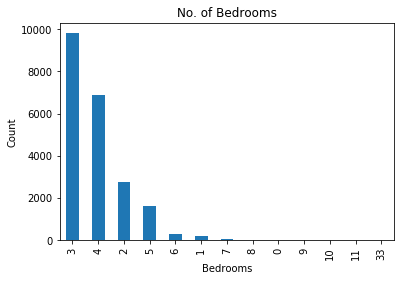

In [10]:
# Exploratory Analysis
# No. of Bedrooms
house['room_bed'].value_counts().plot(kind='bar')
plt.title('No. of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

C:\Users\kishore\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

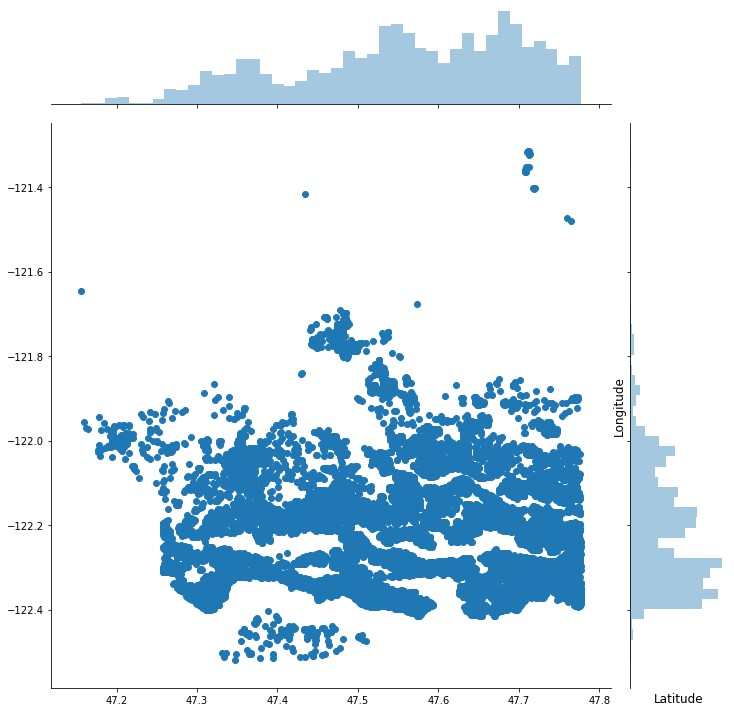

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
# Location of house
plt.figure(figsize=(10,10))
sns.jointplot(x=house.lat.values, y=house.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

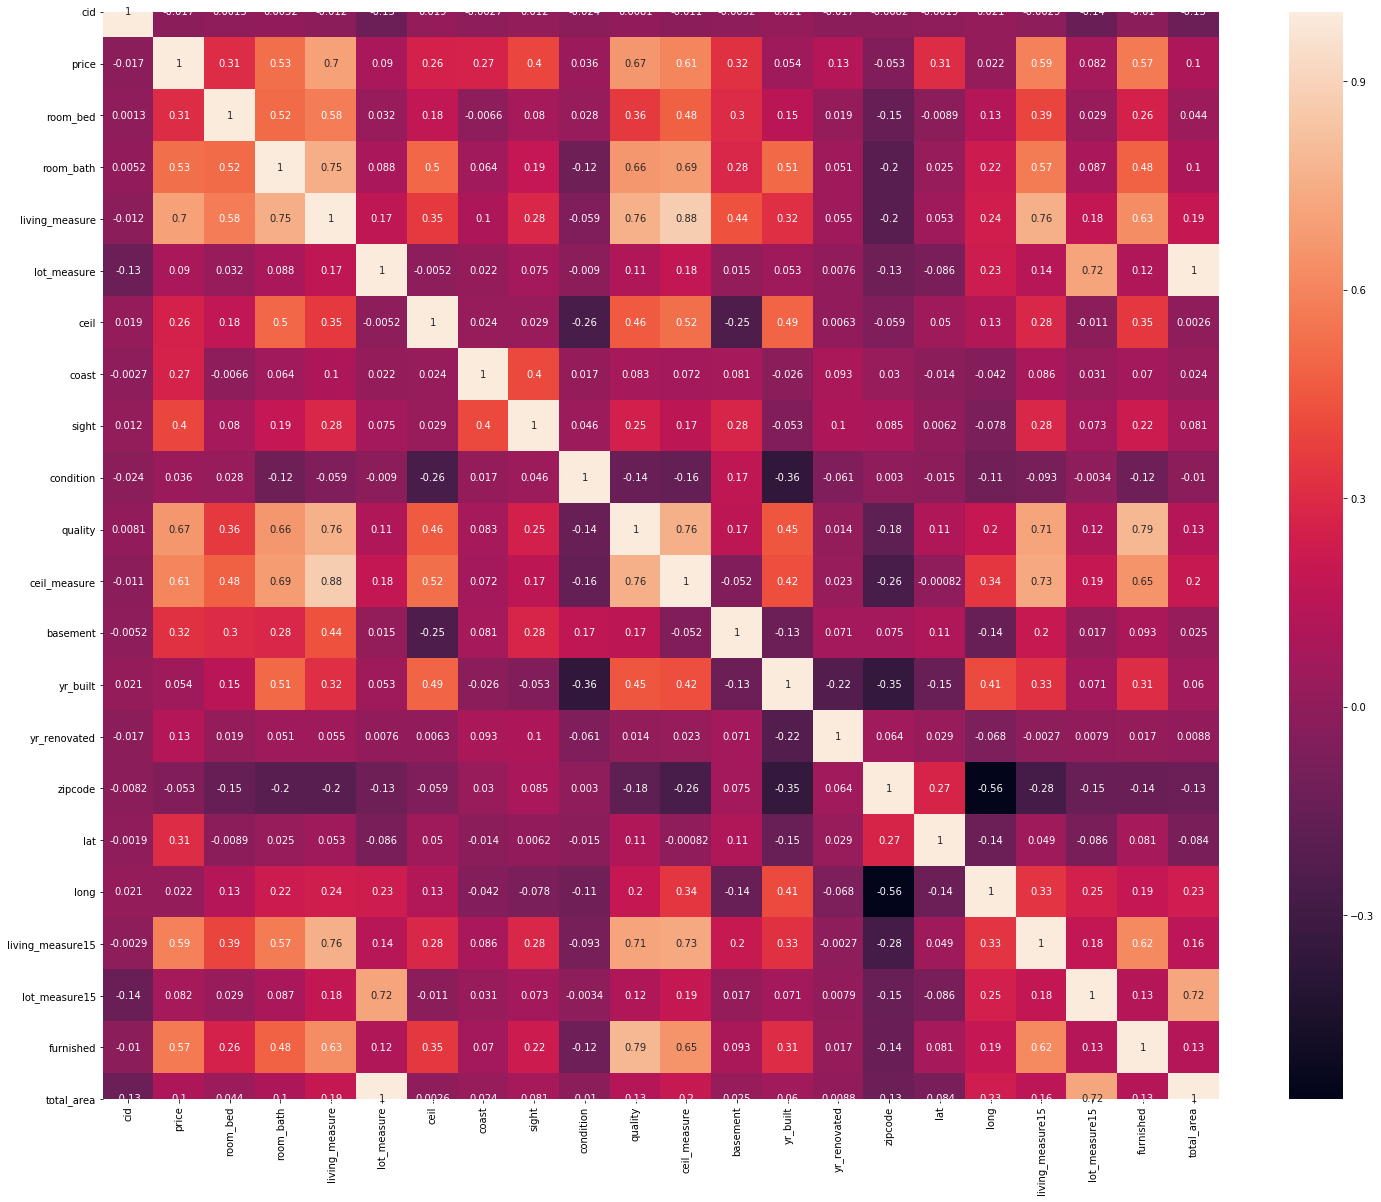

In [12]:
plt.figure(figsize=(25,20))
sns.heatmap(house.corr(),annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000350BB130C8>,
      dtype=object)

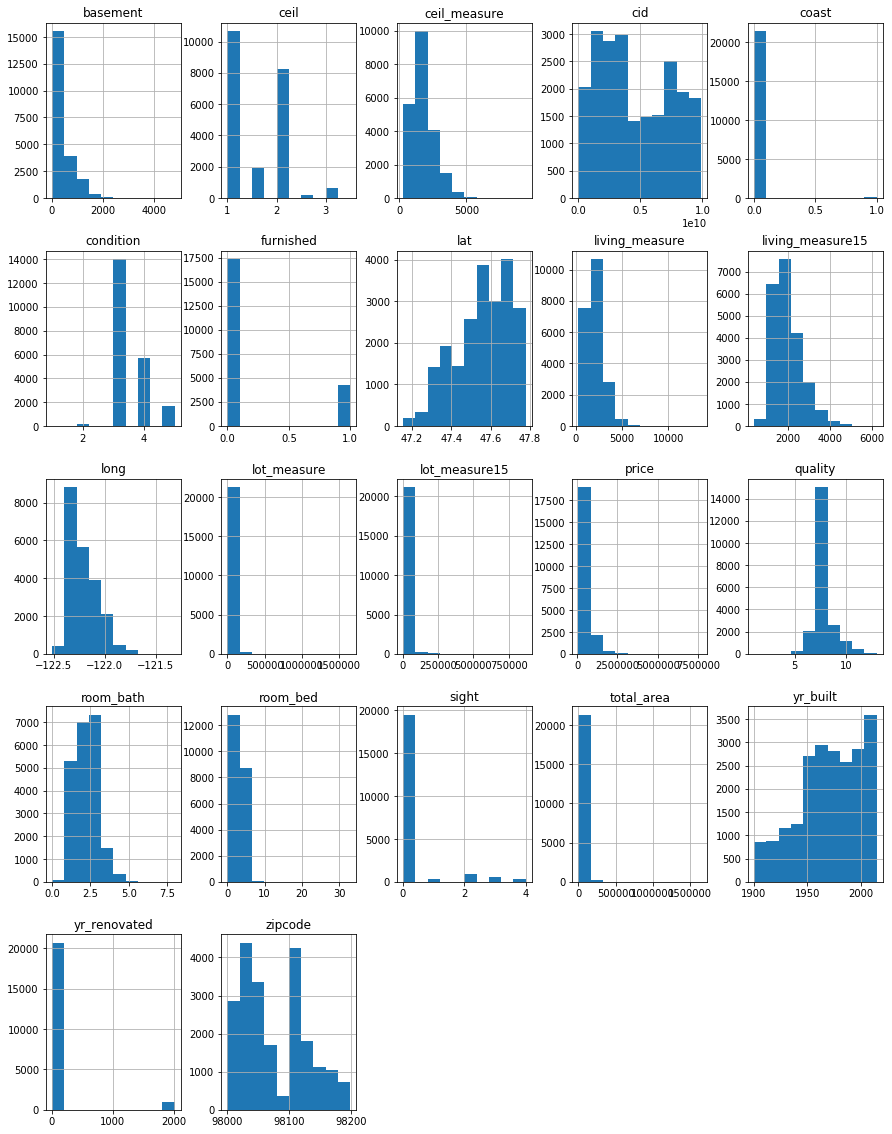

In [13]:
house.hist(figsize=(15,20))

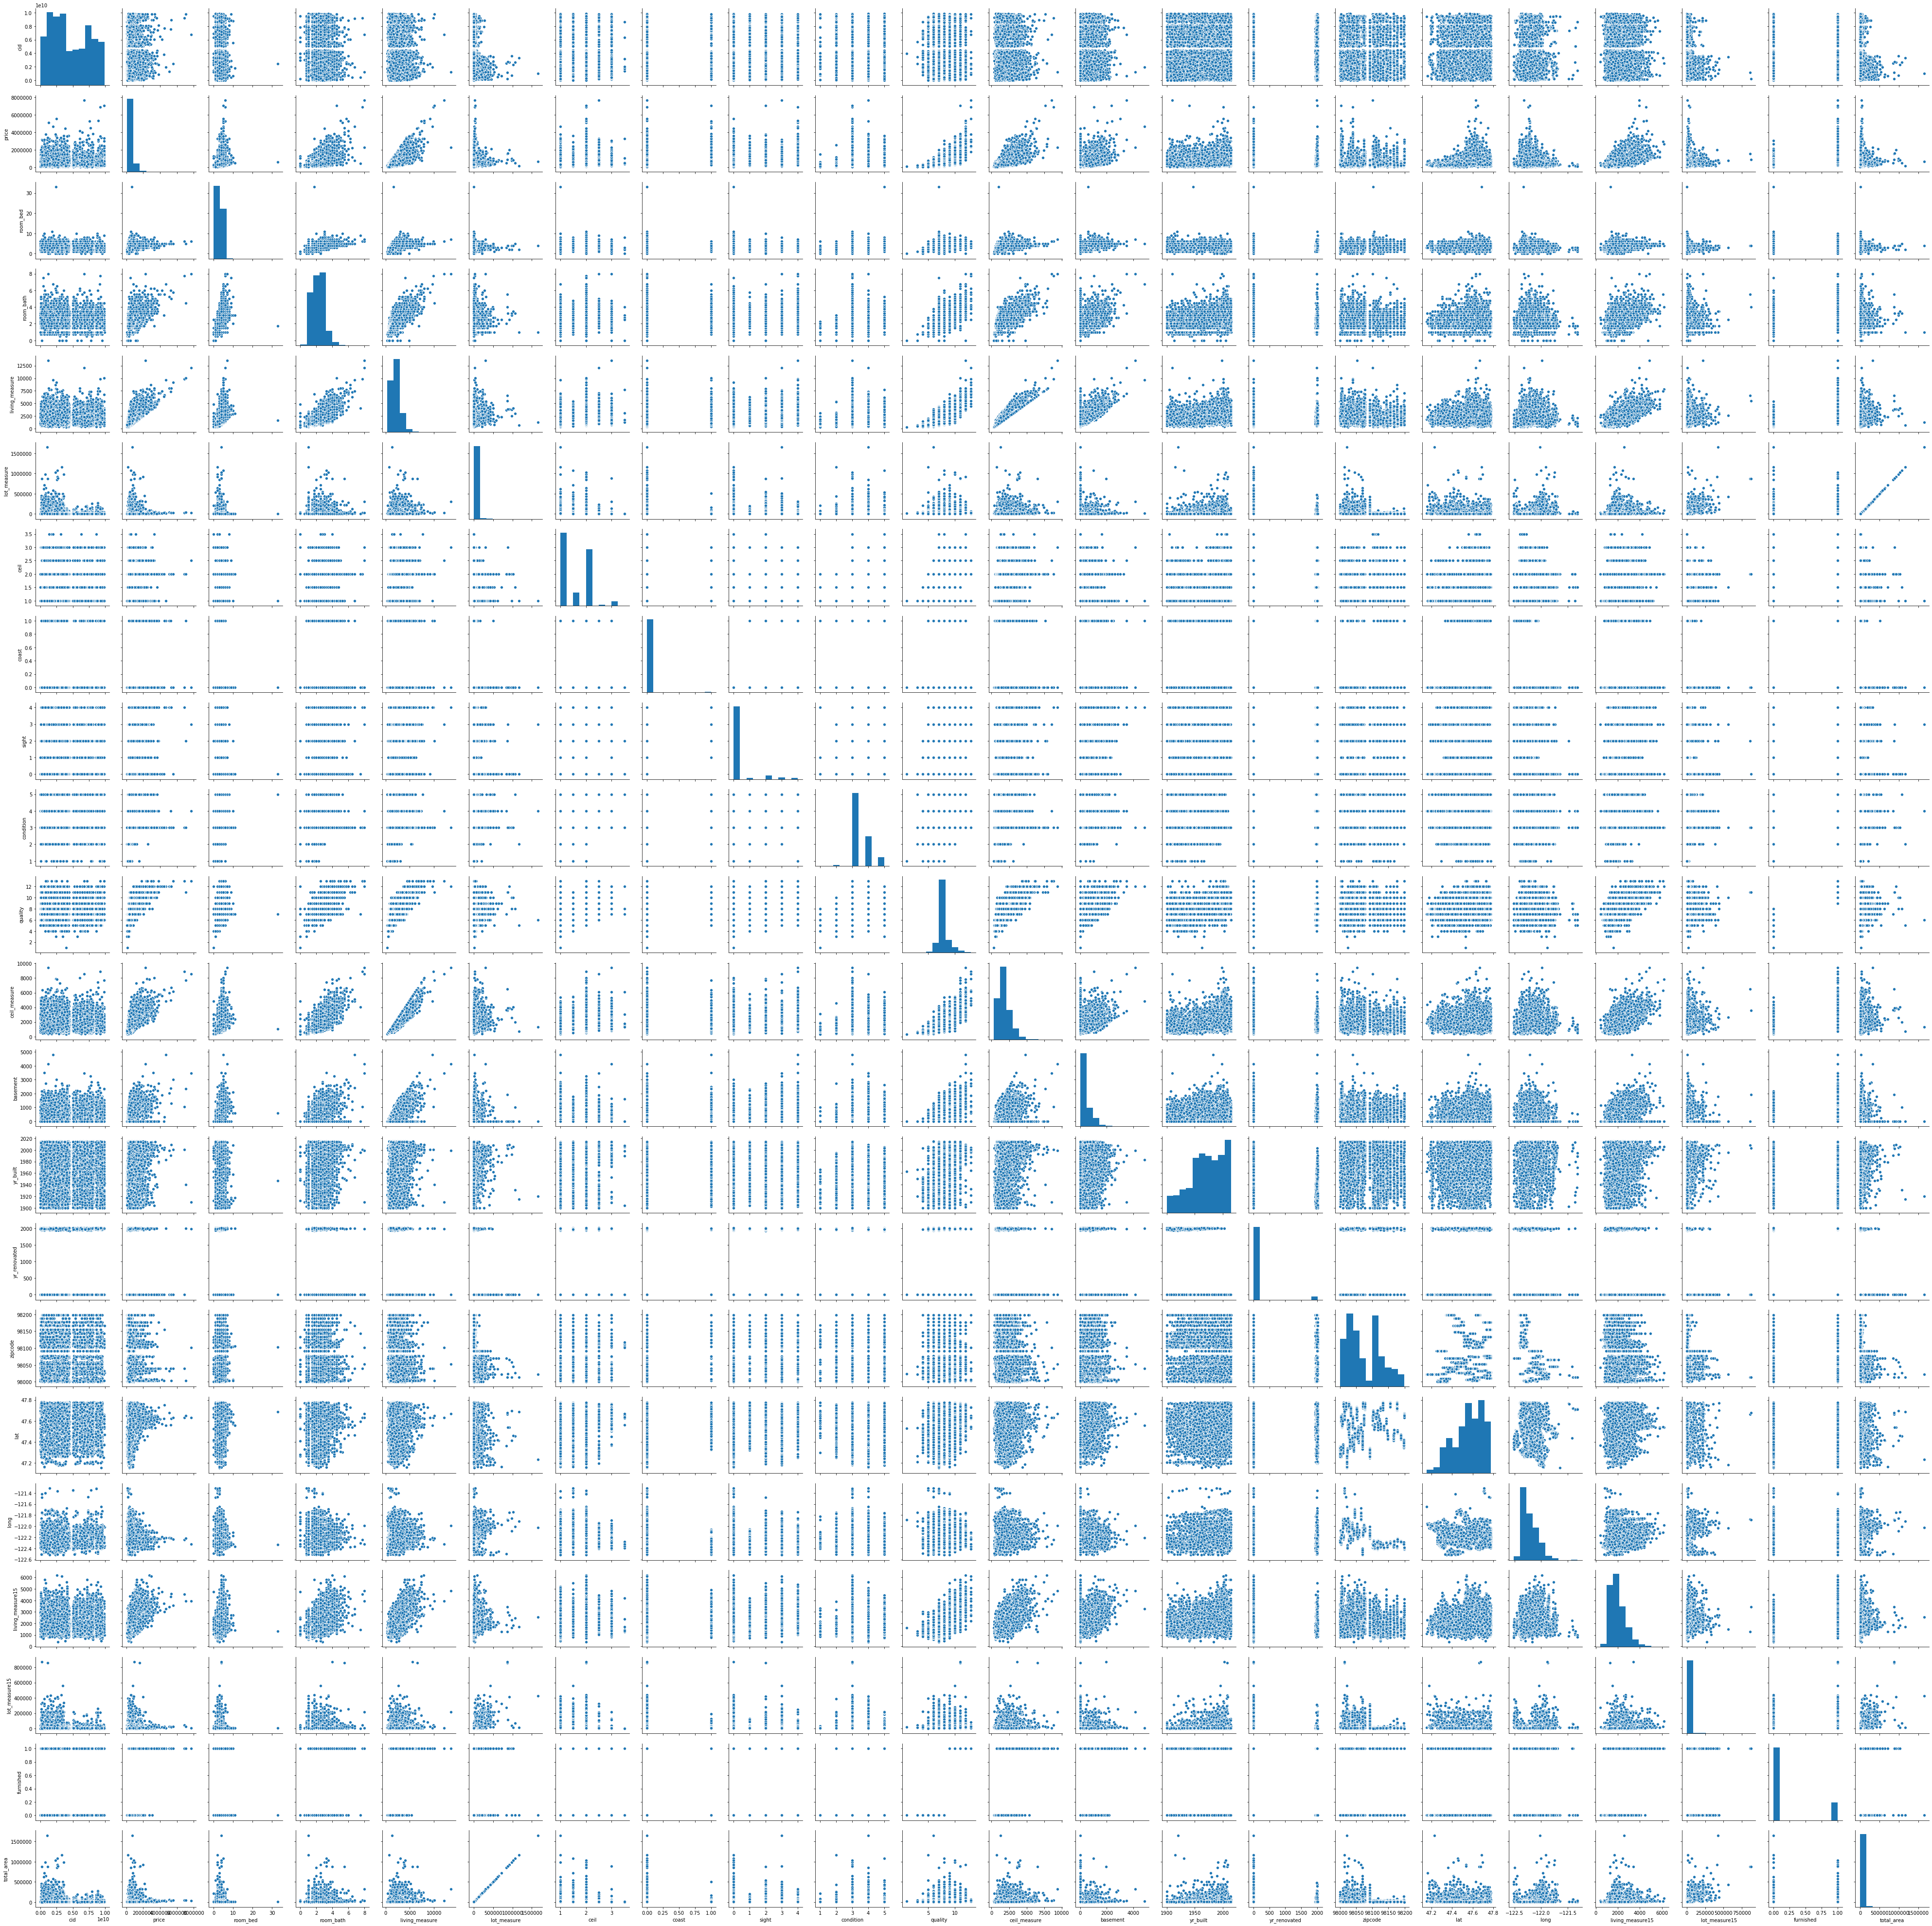

In [14]:
# Correlation among attributes
sns.pairplot(house.iloc[:,:])

In [15]:
house['dayhours']= [x.strip().replace('T000000','') for x in house.dayhours]#removing timestamp from dayhours column
house['dayhours'] = pd.to_datetime(house.dayhours)
house.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4       3.25            3020   
1  8731981640 2014-12-04  277500         4       2.50            2550   
2  5104530220 2015-04-20  404000         3       2.50            2370   
3  6145600285 2014-05-29  300000         2       1.00             820   
4  8924100111 2015-04-24  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [16]:
house['year_sold'] = house.dayhours.dt.year
house.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4       3.25            3020   
1  8731981640 2014-12-04  277500         4       2.50            2550   
2  5104530220 2015-04-20  404000         3       2.50            2370   
3  6145600285 2014-05-29  300000         2       1.00             820   
4  8924100111 2015-04-24  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
0        13457   1.0      0      0  ...      1956             0    98133   
1         7500   1.0      0      0  ...      1976             0    98023   
2         4324   2.0      0      0  ...      2006             0    98038   
3         3844   1.0      0      0  ...      1916             0    98133   
4         4050   1.0      0      0  ...      1954             0    98115   

       lat     long  living_measure15  lot_measure15  furnished  total_area  \
0  47.7174 -122.336              2120           7553          1       16477   
1  47.3165 -122.386              2260           8800          0       10050   
2  47.3515 -121.999              2370           4348          0        6694   
3  47.7049 -122.349              1520           3844          0        4664   
4  47.6768 -122.269              1900           5940          0        5450   

   year_sold  
0       2014  
1       2014  
2       2015  
3       2014  
4       2015  

[5 rows x 24 columns]

In [17]:
house_1 = house.drop(columns = 'dayhours')
house_1[house_1['room_bed'] == 33].index #finding maximum bed room row

Int64Index([750], dtype='int64')

In [18]:
house_1['room_bed']=house_1['room_bed'].astype('category')
house_1.drop(columns = 'cid',inplace=True)

In [19]:
house_1.head()

price room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100        4       3.25            3020        13457   1.0      0   
1  277500        4       2.50            2550         7500   1.0      0   
2  404000        3       2.50            2370         4324   2.0      0   
3  300000        2       1.00             820         3844   1.0      0   
4  699000        2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  yr_built  yr_renovated  zipcode      lat  \
0      0          5        9  ...      1956             0    98133  47.7174   
1      0          3        8  ...      1976             0    98023  47.3165   
2      0          3        8  ...      2006             0    98038  47.3515   
3      0          4        6  ...      1916             0    98133  47.7049   
4      0          4        8  ...      1954             0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  year_sold  
0 -122.336              2120           7553          1       16477       2014  
1 -122.386              2260           8800          0       10050       2014  
2 -121.999              2370           4348          0        6694       2015  
3 -122.349              1520           3844          0        4664       2014  
4 -122.269              1900           5940          0        5450       2015  

[5 rows x 22 columns]

In [20]:
house_1.drop(index=750,inplace=True)

In [21]:
house_1.head()

price room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100        4       3.25            3020        13457   1.0      0   
1  277500        4       2.50            2550         7500   1.0      0   
2  404000        3       2.50            2370         4324   2.0      0   
3  300000        2       1.00             820         3844   1.0      0   
4  699000        2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  yr_built  yr_renovated  zipcode      lat  \
0      0          5        9  ...      1956             0    98133  47.7174   
1      0          3        8  ...      1976             0    98023  47.3165   
2      0          3        8  ...      2006             0    98038  47.3515   
3      0          4        6  ...      1916             0    98133  47.7049   
4      0          4        8  ...      1954             0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  year_sold  
0 -122.336              2120           7553          1       16477       2014  
1 -122.386              2260           8800          0       10050       2014  
2 -121.999              2370           4348          0        6694       2015  
3 -122.349              1520           3844          0        4664       2014  
4 -122.269              1900           5940          0        5450       2015  

[5 rows x 22 columns]

In [22]:
house_1 = house_1.reset_index()
house_1.drop(columns='index',inplace=True)

In [23]:
house_1['room_bath']=house_1['room_bath'].astype('category')
house_1['ceil']=house_1['ceil'].astype('category')
house_1['coast']=house_1['coast'].astype('category')
house_1['sight']=house_1['sight'].astype('category')
house_1['condition']=house_1['condition'].astype('category')
house_1['quality']=house_1['quality'].astype('category')

In [24]:
house_1['have_basement'] = house_1['basement'].apply(lambda x: 0 if x==0 else 1)

In [25]:
house_1['Is_renovated'] = house_1['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [26]:
house_1['Age_of_house'] = house_1['year_sold'] - house_1['yr_built']

In [27]:
house_1

price room_bed room_bath  living_measure  lot_measure ceil coast  \
0      808100        4      3.25            3020        13457  1.0     0   
1      277500        4      2.50            2550         7500  1.0     0   
2      404000        3      2.50            2370         4324  2.0     0   
3      300000        2      1.00             820         3844  1.0     0   
4      699000        2      1.50            1400         4050  1.0     0   
...       ...      ...       ...             ...          ...  ...   ...   
21607  300000        4      2.50            2303         3826  2.0     0   
21608  320000        4      2.50            3490         5000  2.0     0   
21609  483453        4      2.75            2790         5527  2.0     0   
21610  365000        2      2.00            1440        15000  1.0     0   
21611  354950        3      1.00             970         5922  1.5     0   

      sight condition quality  ...      lat     long  living_measure15  \
0         0         5       9  ...  47.7174 -122.336              2120   
1         0         3       8  ...  47.3165 -122.386              2260   
2         0         3       8  ...  47.3515 -121.999              2370   
3         0         4       6  ...  47.7049 -122.349              1520   
4         0         4       8  ...  47.6768 -122.269              1900   
...     ...       ...     ...  ...      ...      ...               ...   
21607     0         3       8  ...  47.3258 -122.165              2516   
21608     0         3       8  ...  47.3772 -122.127              2910   
21609     0         3       8  ...  47.4827 -121.773              2620   
21610     0         3       7  ...  47.7648 -122.159              1780   
21611     0         3       7  ...  47.7190 -122.321              1730   

       lot_measure15  furnished  total_area  year_sold  have_basement  \
0               7553          1       16477       2014              0   
1               8800          0       10050       2014              1   
2               4348          0        6694       2015              0   
3               3844          0        4664       2014              0   
4               5940          0        5450       2015              0   
...              ...        ...         ...        ...            ...   
21607           4500          0        6129       2014              0   
21608           5025          0        8490       2014              0   
21609           5509          0        8317       2014              0   
21610          15000          0       16440       2014              0   
21611           6128          0        6892       2015              0   

       Is_renovated  Age_of_house  
0                 0            58  
1                 0            38  
2                 0             9  
3                 0            98  
4                 0            61  
...             ...           ...  
21607             0             8  
21608             0            11  
21609             0             0  
21610             0            29  
21611             0            66  

[21612 rows x 25 columns]

In [28]:
lst = []
for i in house_1.lat:
    if i<47.255900:
        lst.append('ES')
    elif i>47.255900 and i<47.405900:
        lst.append('MS')
    elif i>47.405900 and i<47.555900:
        lst.append('MN')
    else:
        lst.append('EN')
house_1['SN_region'] = lst
house_1['SN_region'] = house_1['SN_region'].astype('category')

In [29]:
lst = []
for i in abs(house_1.long):
    if i<122.105000:
        lst.append('EE')
    elif i>122.105000 and i<122.205000:
        lst.append('ME')
    elif i>122.205000 and i<122.328000:
        lst.append('MW')
    else:
        lst.append('EW')
house_1['EW_region'] = lst
house_1['EW_region'] = house_1['EW_region'].astype('category')

In [30]:
delete_index = house_1[house_1['Age_of_house']== -1]['year_sold'].index
house_1.drop(index=delete_index,inplace = True)

In [31]:
house_1.head()

price room_bed room_bath  living_measure  lot_measure ceil coast sight  \
0  808100        4      3.25            3020        13457  1.0     0     0   
1  277500        4      2.50            2550         7500  1.0     0     0   
2  404000        3      2.50            2370         4324  2.0     0     0   
3  300000        2      1.00             820         3844  1.0     0     0   
4  699000        2      1.50            1400         4050  1.0     0     0   

  condition quality  ...  living_measure15  lot_measure15  furnished  \
0         5       9  ...              2120           7553          1   
1         3       8  ...              2260           8800          0   
2         3       8  ...              2370           4348          0   
3         4       6  ...              1520           3844          0   
4         4       8  ...              1900           5940          0   

   total_area  year_sold  have_basement  Is_renovated  Age_of_house  \
0       16477       2014              0             0            58   
1       10050       2014              1             0            38   
2        6694       2015              0             0             9   
3        4664       2014              0             0            98   
4        5450       2015              0             0            61   

   SN_region  EW_region  
0         EN         EW  
1         MS         EW  
2         MS         EE  
3         EN         EW  
4         EN         MW  

[5 rows x 27 columns]

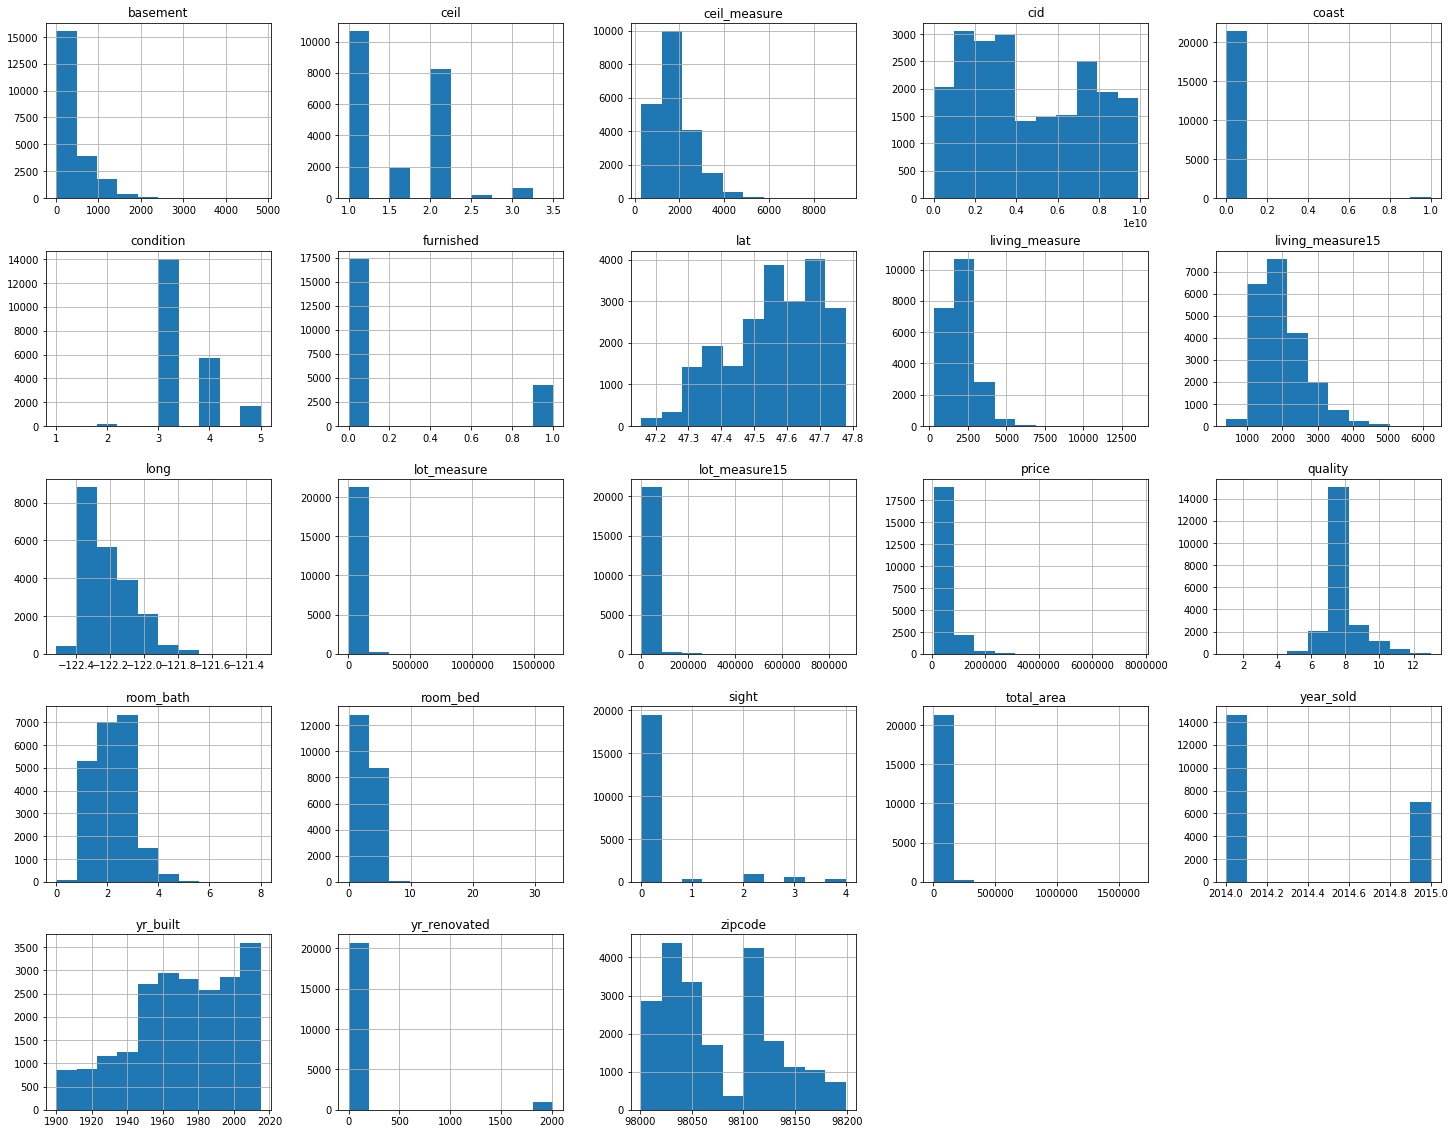

In [32]:
house.hist(figsize=(25,20))
plt.show()

In [33]:
list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode']
house_def = house.drop(columns=list1)
def trend():
    for i in house_def.columns:
        house[[i,'price']].groupby([i]).sum().plot(figsize=(15,5))
        plt.show()

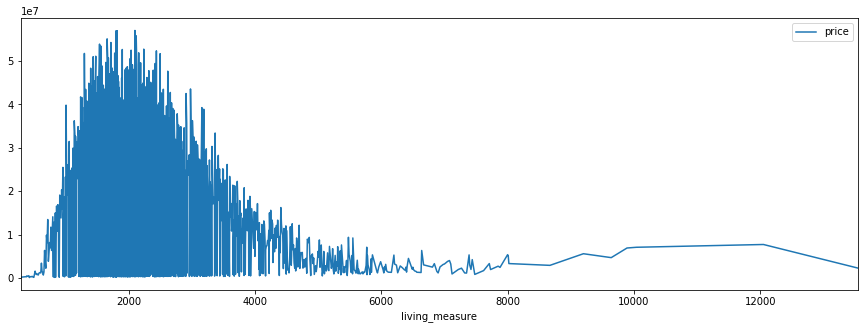

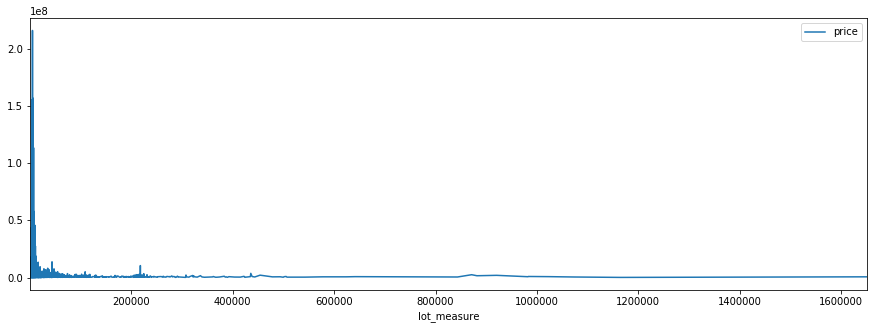

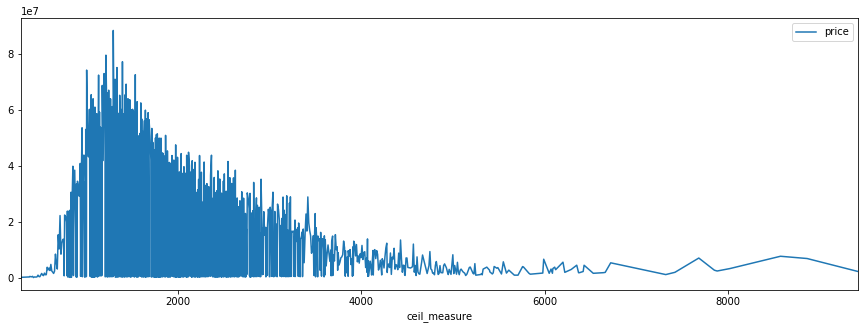

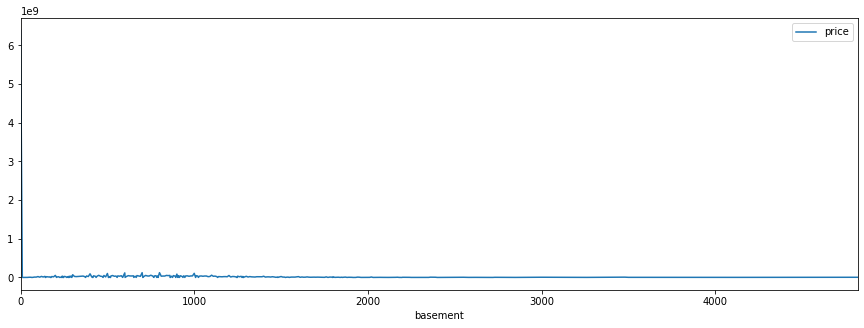

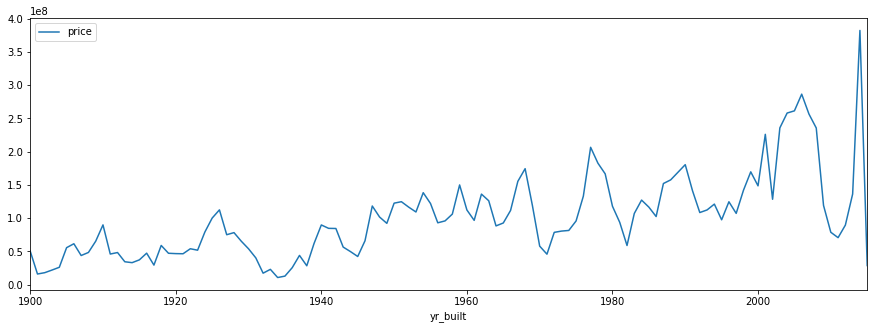

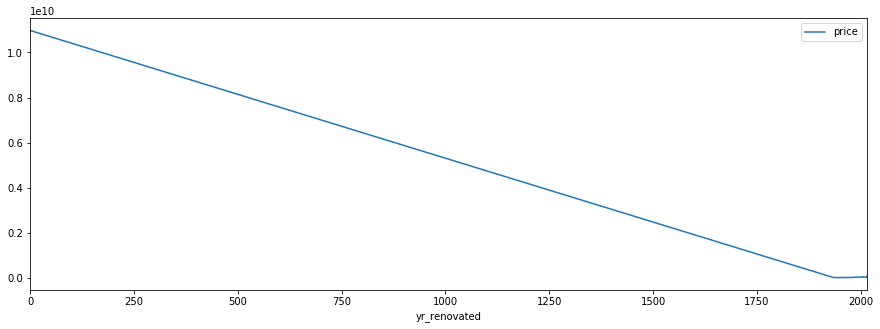

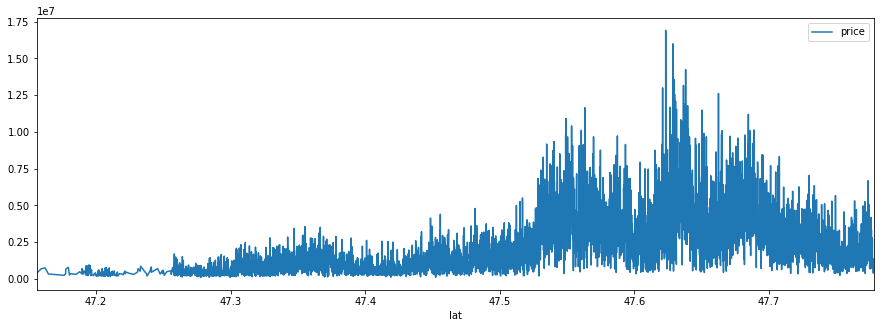

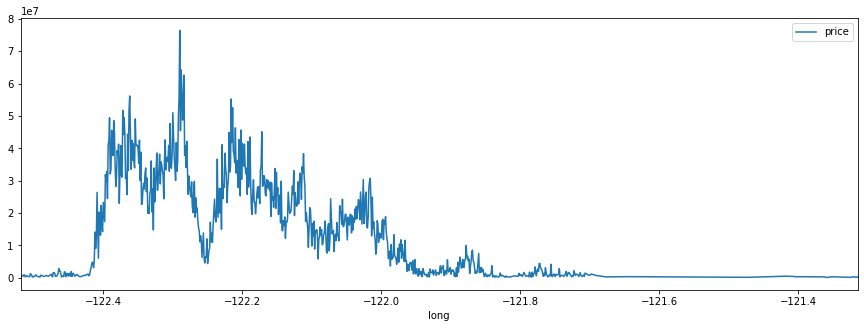

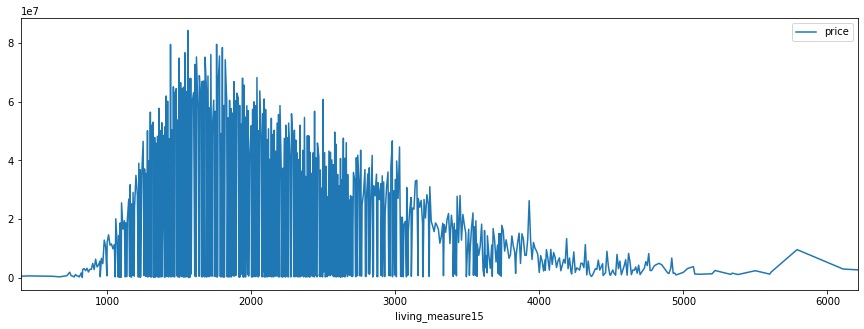

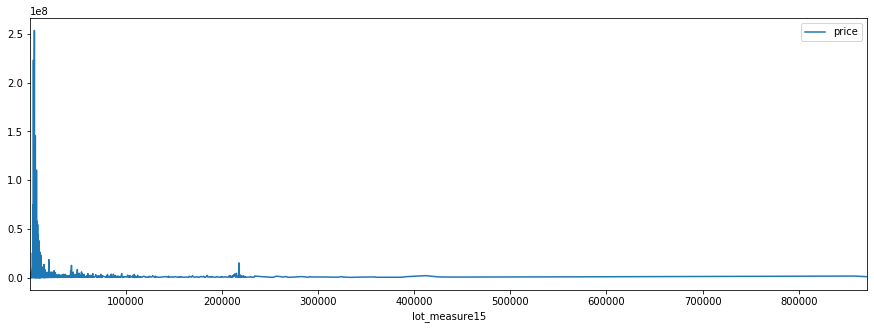

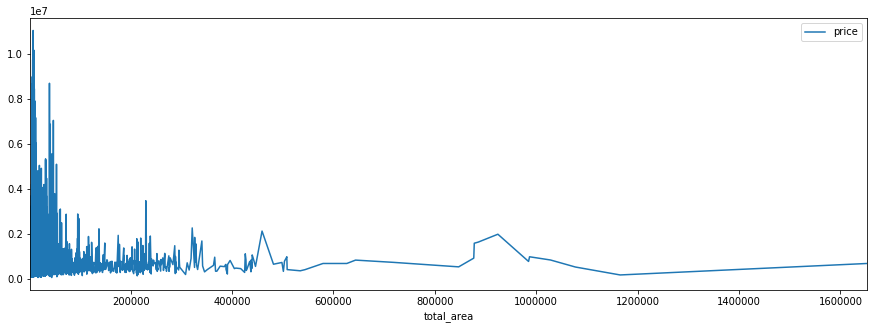

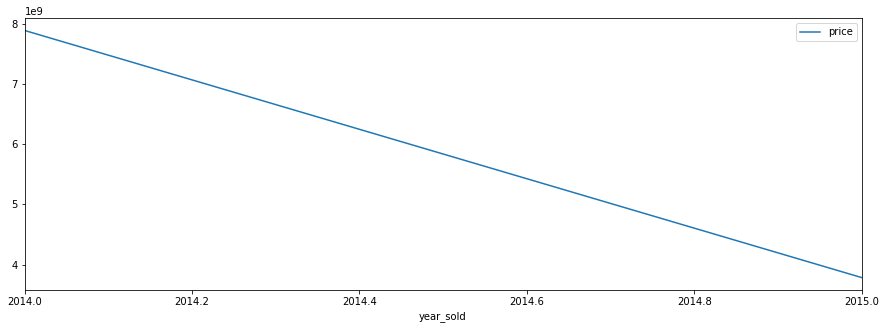

In [34]:
trend()

In [35]:
list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode','year_sold','yr_renovated','lat','long']
house_def = house.drop(columns=list1)
def scatterr():
    for i in house_def.columns:
        plt.figure(figsize=(15,5))
        sns.regplot(x='price',y=i, data=house, color='#79d13e')
        plt.show()

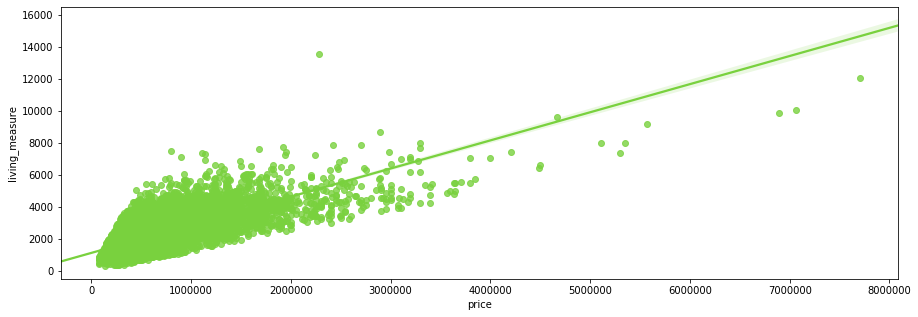

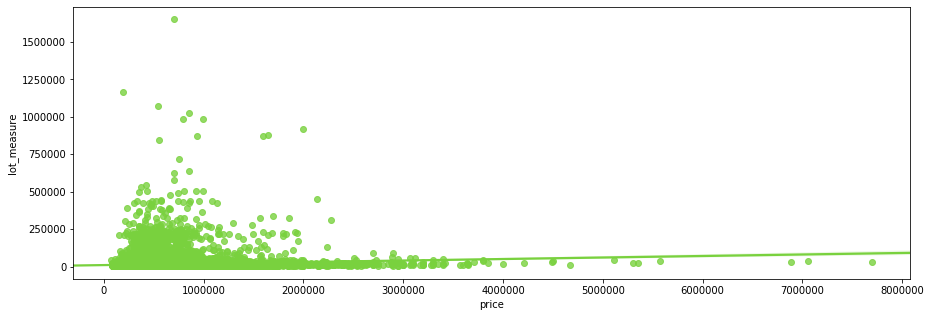

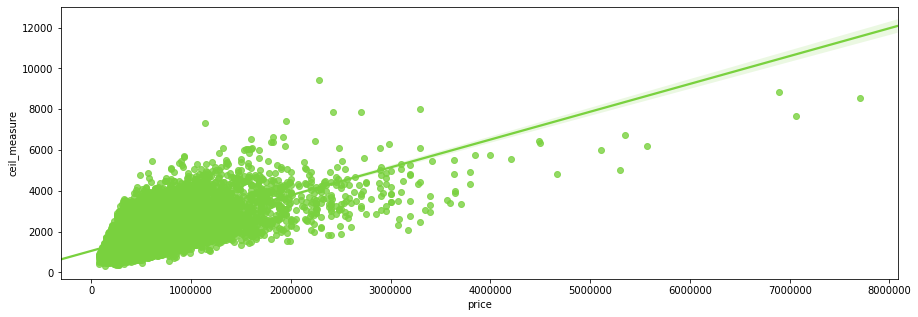

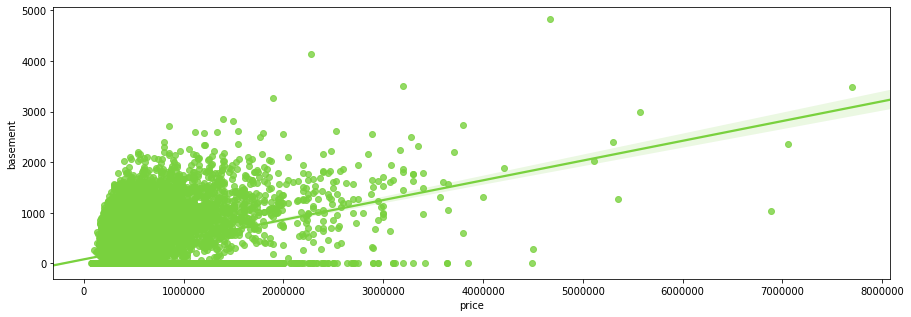

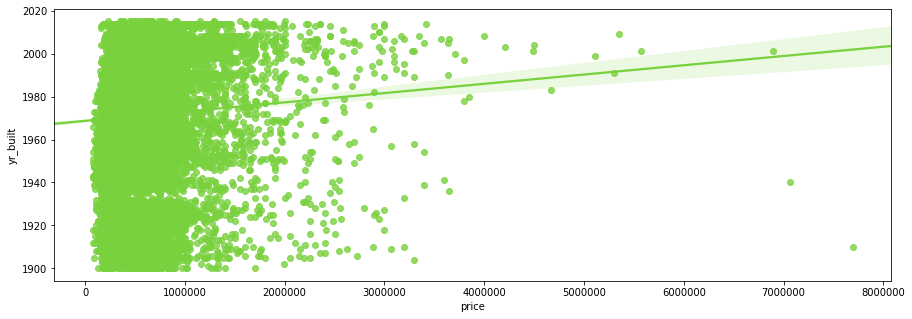

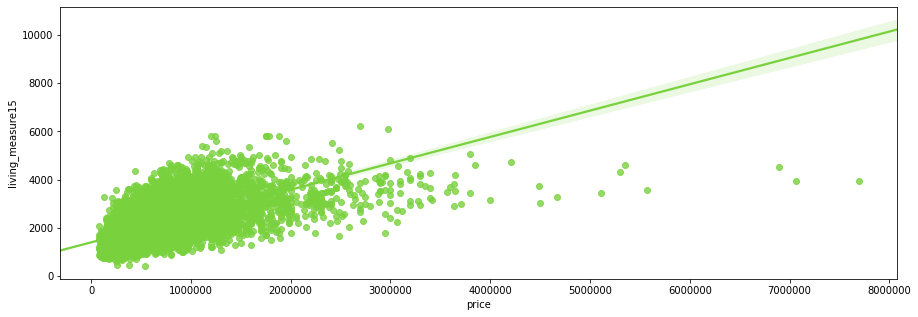

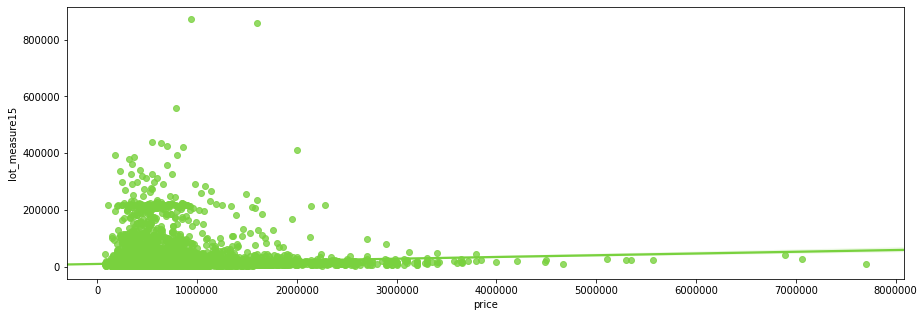

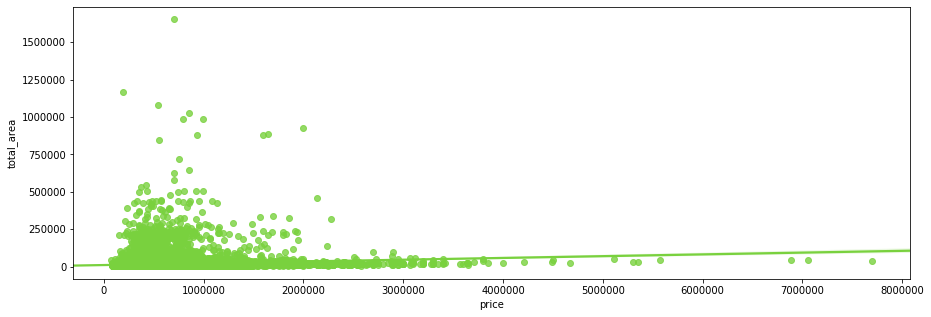

In [36]:
scatterr()

In [37]:
house_1.shape

(21600, 27)

In [38]:
house_1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'year_sold', 'have_basement', 'Is_renovated', 'Age_of_house',
       'SN_region', 'EW_region'],
      dtype='object')

In [39]:
details(house_1)

Null Values Data Type  No. of Unique Values
price                       0     int64                  3622
room_bed                    0  category                    12
room_bath                   0  category                    30
living_measure              0     int64                  1038
lot_measure                 0     int64                  9779
ceil                        0  category                     6
coast                       0  category                     2
sight                       0  category                     5
condition                   0  category                     5
quality                     0  category                    12
ceil_measure                0     int64                   946
basement                    0     int64                   306
yr_built                    0     int64                   116
yr_renovated                0     int64                    70
zipcode                     0     int64                    70
lat                         0   float64                  5033
long                        0   float64                   752
living_measure15            0     int64                   777
lot_measure15               0     int64                  8688
furnished                   0     int64                     2
total_area                  0     int64                 11160
year_sold                   0     int64                     2
have_basement               0     int64                     2
Is_renovated                0     int64                     2
Age_of_house                0     int64                   116
SN_region                   0  category                     4
EW_region                   0  category                     4

In [40]:
data = house_1.copy()

In [41]:
data.head()

price room_bed room_bath  living_measure  lot_measure ceil coast sight  \
0  808100        4      3.25            3020        13457  1.0     0     0   
1  277500        4      2.50            2550         7500  1.0     0     0   
2  404000        3      2.50            2370         4324  2.0     0     0   
3  300000        2      1.00             820         3844  1.0     0     0   
4  699000        2      1.50            1400         4050  1.0     0     0   

  condition quality  ...  living_measure15  lot_measure15  furnished  \
0         5       9  ...              2120           7553          1   
1         3       8  ...              2260           8800          0   
2         3       8  ...              2370           4348          0   
3         4       6  ...              1520           3844          0   
4         4       8  ...              1900           5940          0   

   total_area  year_sold  have_basement  Is_renovated  Age_of_house  \
0       16477       2014              0             0            58   
1       10050       2014              1             0            38   
2        6694       2015              0             0             9   
3        4664       2014              0             0            98   
4        5450       2015              0             0            61   

   SN_region  EW_region  
0         EN         EW  
1         MS         EW  
2         MS         EE  
3         EN         EW  
4         EN         MW  

[5 rows x 27 columns]

## Creating dumpy data 

In [42]:
dummy_data = pd.get_dummies(data)

In [43]:
dummy_data.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  808100            3020        13457          3020         0      1956   
1  277500            2550         7500          1750       800      1976   
2  404000            2370         4324          2370         0      2006   
3  300000             820         3844           820         0      1916   
4  699000            1400         4050          1400         0      1954   

   yr_renovated  zipcode      lat     long  ...  quality_12  quality_13  \
0             0    98133  47.7174 -122.336  ...           0           0   
1             0    98023  47.3165 -122.386  ...           0           0   
2             0    98038  47.3515 -121.999  ...           0           0   
3             0    98133  47.7049 -122.349  ...           0           0   
4             0    98115  47.6768 -122.269  ...           0           0   

   SN_region_EN  SN_region_ES  SN_region_MN  SN_region_MS  EW_region_EE  \
0             1             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             1             1   
3             1             0             0             0             0   
4             1             0             0             0             0   

   EW_region_EW  EW_region_ME  EW_region_MW  
0             1             0             0  
1             1             0             0  
2             0             0             0  
3             1             0             0  
4             0             0             1  

[5 rows x 99 columns]

In [44]:
for i in dummy_data.columns:
    print(i)

price
living_measure
lot_measure
ceil_measure
basement
yr_built
yr_renovated
zipcode
lat
long
living_measure15
lot_measure15
furnished
total_area
year_sold
have_basement
Is_renovated
Age_of_house
room_bed_0
room_bed_1
room_bed_2
room_bed_3
room_bed_4
room_bed_5
room_bed_6
room_bed_7
room_bed_8
room_bed_9
room_bed_10
room_bed_11
room_bed_33
room_bath_0.0
room_bath_0.5
room_bath_0.75
room_bath_1.0
room_bath_1.25
room_bath_1.5
room_bath_1.75
room_bath_2.0
room_bath_2.25
room_bath_2.5
room_bath_2.75
room_bath_3.0
room_bath_3.25
room_bath_3.5
room_bath_3.75
room_bath_4.0
room_bath_4.25
room_bath_4.5
room_bath_4.75
room_bath_5.0
room_bath_5.25
room_bath_5.5
room_bath_5.75
room_bath_6.0
room_bath_6.25
room_bath_6.5
room_bath_6.75
room_bath_7.5
room_bath_7.75
room_bath_8.0
ceil_1.0
ceil_1.5
ceil_2.0
ceil_2.5
ceil_3.0
ceil_3.5
coast_0
coast_1
sight_0
sight_1
sight_2
sight_3
sight_4
condition_1
condition_2
condition_3
condition_4
condition_5
quality_1
quality_3
quality_4
quality_5
quality_6
qual

# Dropping data

In [45]:
drop_list = ['lat','long','zipcode','yr_built','year_sold','yr_renovated','basement','total_area',
'room_bed_33']

In [46]:
dummy_data.drop(columns=drop_list,inplace =True)

In [47]:
dummy_data.head()

price  living_measure  lot_measure  ceil_measure  living_measure15  \
0  808100            3020        13457          3020              2120   
1  277500            2550         7500          1750              2260   
2  404000            2370         4324          2370              2370   
3  300000             820         3844           820              1520   
4  699000            1400         4050          1400              1900   

   lot_measure15  furnished  have_basement  Is_renovated  Age_of_house  ...  \
0           7553          1              0             0            58  ...   
1           8800          0              1             0            38  ...   
2           4348          0              0             0             9  ...   
3           3844          0              0             0            98  ...   
4           5940          0              0             0            61  ...   

   quality_12  quality_13  SN_region_EN  SN_region_ES  SN_region_MN  \
0           0           0             1             0             0   
1           0           0             0             0             0   
2           0           0             0             0             0   
3           0           0             1             0             0   
4           0           0             1             0             0   

   SN_region_MS  EW_region_EE  EW_region_EW  EW_region_ME  EW_region_MW  
0             0             0             1             0             0  
1             1             0             1             0             0  
2             1             1             0             0             0  
3             0             0             1             0             0  
4             0             0             0             0             1  

[5 rows x 90 columns]

In [48]:
dummy_data.corr()['price']

price               1.000000
living_measure      0.702307
lot_measure         0.089631
ceil_measure        0.605737
living_measure15    0.585404
                      ...   
SN_region_MS       -0.281826
EW_region_EE        0.011036
EW_region_EW       -0.036555
EW_region_ME       -0.007324
EW_region_MW        0.031395
Name: price, Length: 90, dtype: float64

In [49]:
details(dummy_data)

Null Values Data Type  No. of Unique Values
price                       0     int64                  3622
living_measure              0     int64                  1038
lot_measure                 0     int64                  9779
ceil_measure                0     int64                   946
living_measure15            0     int64                   777
...                       ...       ...                   ...
SN_region_MS                0     uint8                     2
EW_region_EE                0     uint8                     2
EW_region_EW                0     uint8                     2
EW_region_ME                0     uint8                     2
EW_region_MW                0     uint8                     2

[90 rows x 3 columns]

In [50]:
x = dummy_data.drop(columns='price')
y = dummy_data.price

# Splitting data into train and test 

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100) 

In [52]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)# Add constant X
X_test = sm.add_constant(x_test)
ols_model=sm.OLS(y_train,X_train).fit()
residuals = ols_model.resid
ols_model.summary()

C:\Users\kishore\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     599.8
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:35:44   Log-Likelihood:            -2.0473e+05
No. Observations:               15120   AIC:                         4.096e+05
Df Residuals:                   15041   BIC:                         4.102e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.624e+05   1.82e+04     14.448      0.000    2.27e+05    2.98e+05
living_measure     110.9634      7.013     15.822      0.000      97.217     124.710
lot_measure          0.2014      0.053      3.777      0.000       0.097       0.306
ceil_measure        24.2996      7.785      3.122      0.002       9.041      39.558
living_measure15    40.6798      3.888     10.463      0.000      33.059      48.300
lot_measure15       -0.5190      0.080     -6.488      0.000      -0.676      -0.362
furnished         5.268e+05   3.31e+04     15.912      0.000    4.62e+05    5.92e+05
have_basement     6413.4241   5948.338      1.078      0.281   -5246.043    1.81e+04
Is_renovated      8.152e+04   8074.535     10.096      0.000    6.57e+04    9.73e+04
Age_of_house      1169.4996     90.860     12.871      0.000     991.403    1347.596
room_bed_0        1.258e+05   7.31e+04      1.722      0.085   -1.74e+04    2.69e+05
room_bed_1        6.644e+04   2.36e+04      2.817      0.005    2.02e+04    1.13e+05
room_bed_2         7.74e+04   1.88e+04      4.116      0.000    4.05e+04    1.14e+05
room_bed_3        6.891e+04   1.84e+04      3.748      0.000    3.29e+04    1.05e+05
room_bed_4        4.481e+04   1.84e+04      2.439      0.015    8797.848    8.08e+04
room_bed_5        3.809e+04   1.88e+04      2.025      0.043    1217.639     7.5e+04
room_bed_6        7383.6090   2.19e+04      0.338      0.736   -3.55e+04    5.02e+04
room_bed_7       -1.039e+04   3.64e+04     -0.285      0.776   -8.18e+04     6.1e+04
room_bed_8        1.111e+05   5.97e+04      1.861      0.063   -5919.709    2.28e+05
room_bed_9        -1.42e+05   9.91e+04     -1.433      0.152   -3.36e+05    5.23e+04
room_bed_10      -1.251e+05   1.23e+05     -1.020      0.308   -3.65e+05    1.15e+05
room_bed_11       1.853e-09   5.63e-10      3.290      0.001    7.49e-10    2.96e-09
room_bath_0.0    -2.907e+05   1.03e+05     -2.815      0.005   -4.93e+05   -8.83e+04
room_bath_0.5    -4.355e+05   1.28e+05     -3.405      0.001   -6.86e+05   -1.85e+05
room_bath_0.75   -3.344e+05   3.45e+04     -9.695      0.000   -4.02e+05   -2.67e+05
room_bath_1.0    -2.968e+05   2.09e+04    -14.211      0.000   -3.38e+05   -2.56e+05
room_bath_1.25   -3.475e+05   7.55e+04     -4.603      0.000   -4.95e+05      -2e+05
room_bath_1.5    -2.996e+05   2.09e+04    -14.366      0.000    -3.4e+05   -2.59e+05
room_bath_1.75   -2.953e+05   2.03e+04    -14.539      0.000   -3.35e+05   -2.55e+05
room_bath_2.0    -2.912e+05   2.05e+04    -14.231      0.000   -3.31e+05   -2.51e+05
room_bath_2.25   -2.758e+05   2.02e+04    -13.669      0.000   -3.15e+05   -2.36e+05
room_bath_2.5    -2.849e+05   1.97e+04    -14.459      0.000   -3.24e+05   -2.46e+05
room_bath_2.75   -2.891e+05   2.03e+04    -14.266      0.000   -3.29e+05   -2.49e+05
room_bath_3.0    -2.645

In [53]:
x = dummy_data[['SN_region_MS', 'living_measure', 'sight_4', 'SN_region_EN', 'furnished', 'quality_9', 'quality_10', 'Age_of_house', 'coast_1', 'quality_13', 'sight_0', 'quality_12', 'quality_8', 'room_bath_7.75', 'EW_region_EE', 'condition_5', 'Is_renovated', 'condition_4', 'room_bath_6.0', 'EW_region_MW', 'living_measure15', 'EW_region_EW', 'room_bath_4.75', 'room_bath_8.0', 'ceil_2.5', 'quality_7', 'room_bath_4.25', 'room_bath_3.25', 'room_bath_5.5', 'room_bath_3.75', 'room_bath_5.25', 'room_bath_5.0', 'room_bath_4.5', 'room_bath_4.0', 'quality_11', 'sight_2', 'lot_measure15', 'room_bath_3.5', 'room_bed_4', 'room_bed_6', 'ceil_1.0', 'room_bed_7', 'room_bath_5.75', 'room_bed_5', 'SN_region_ES', 'room_bath_3.0', 'lot_measure', 'room_bath_6.25', 'room_bath_2.25', 'ceil_measure', 'room_bath_6.75']]
x = x.drop(columns='ceil_1.0')
y = dummy_data.price

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100) 


In [55]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)# Add constant X
X_test = sm.add_constant(x_test)
ols_model=sm.OLS(y_train,X_train).fit()
residuals = ols_model.resid
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     953.6
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:35:45   Log-Likelihood:            -2.0474e+05
No. Observations:               15120   AIC:                         4.096e+05
Df Residuals:                   15070   BIC:                         4.100e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.387e+04    1.3e+04      1.837      0.066   -1598.299    4.93e+04
SN_region_MS     -9.636e+04   4756.486    -20.259      0.000   -1.06e+05    -8.7e+04
living_measure     115.5115      4.471     25.838      0.000     106.748     124.275
sight_4           9.652e+04    1.7e+04      5.665      0.000    6.31e+04     1.3e+05
SN_region_EN       1.52e+05   3662.701     41.493      0.000    1.45e+05    1.59e+05
furnished         6.135e+05   1.66e+04     36.917      0.000    5.81e+05    6.46e+05
quality_9        -3.981e+05   1.46e+04    -27.326      0.000   -4.27e+05    -3.7e+05
quality_10        -2.58e+05   1.47e+04    -17.494      0.000   -2.87e+05   -2.29e+05
Age_of_house      1079.3731     76.261     14.154      0.000     929.892    1228.855
coast_1           5.716e+05   2.16e+04     26.422      0.000    5.29e+05    6.14e+05
quality_13        9.948e+05   6.23e+04     15.980      0.000    8.73e+05    1.12e+06
sight_0          -1.152e+05   8154.589    -14.128      0.000   -1.31e+05   -9.92e+04
quality_12        3.343e+05   2.43e+04     13.776      0.000    2.87e+05    3.82e+05
quality_8         1.052e+05   6858.764     15.339      0.000    9.18e+04    1.19e+05
room_bath_7.75    3.516e+06   2.01e+05     17.532      0.000    3.12e+06    3.91e+06
EW_region_EE     -1.841e+04   4749.671     -3.876      0.000   -2.77e+04   -9099.912
condition_5       9.148e+04   6129.432     14.925      0.000    7.95e+04    1.03e+05
Is_renovated      8.443e+04   7933.322     10.642      0.000    6.89e+04       1e+05
condition_4       3.975e+04   3788.491     10.493      0.000    3.23e+04    4.72e+04
room_bath_6.0     1.032e+06   9.48e+04     10.888      0.000    8.46e+05    1.22e+06
EW_region_MW      4.573e+04   4473.251     10.222      0.000     3.7e+04    5.45e+04
living_measure15    40.8321      3.836     10.644      0.000      33.313      48.351
EW_region_EW      3.194e+04   4823.294      6.623      0.000    2.25e+04    4.14e+04
room_bath_4.75    4.693e+05    4.9e+04      9.567      0.000    3.73e+05    5.65e+05
room_bath_8.0     1.548e+06   1.41e+05     11.008      0.000    1.27e+06    1.82e+06
ceil_2.5           1.05e+05   1.76e+04      5.956      0.000    7.05e+04     1.4e+05
quality_7         4.356e+04   5633.859      7.732      0.000    3.25e+04    5.46e+04
room_bath_4.25    2.328e+05    2.6e+04      8.956      0.000    1.82e+05    2.84e+05
room_bath_3.25    9.983e+04   9810.039     10.176      0.000    8.06e+04    1.19e+05
room_bath_5.5     5.061e+05   7.21e+04      7.023      0.000    3.65e+05    6.47e+05
room_bath_3.75    1.044e+05   1.83e+04      5.708      0.000    6.86e+04     1.4e+05
room_bath_5.25    3.707e+05   5.67e+04      6.541      0.000     2.6e+05    4.82e+05
room_bath_5.0     3.873e+05   4.47e+04      8.667      0.000       3e+05    4.75e+05
room_bath_4.5     1.799

# Fitting data into Linear Regression model

In [56]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)
print(lm.intercept_)
li_y_pred=lm.predict(x_test)
print(lm.score(x_test,y_test))

                   0             0
0       SN_region_MS -9.638563e+04
1     living_measure  1.155119e+02
2            sight_4  9.652017e+04
3       SN_region_EN  1.519419e+05
4          furnished  6.377130e+11
5          quality_9 -6.377128e+11
6         quality_10 -6.377127e+11
7       Age_of_house  1.079393e+03
8            coast_1  5.715259e+05
9         quality_13 -6.377114e+11
10           sight_0 -1.152049e+05
11        quality_12 -6.377121e+11
12         quality_8  1.052067e+05
13    room_bath_7.75  3.515779e+06
14      EW_region_EE -1.841227e+04
15       condition_5  9.149071e+04
16      Is_renovated  8.442793e+04
17       condition_4  3.975534e+04
18     room_bath_6.0  1.031872e+06
19      EW_region_MW  4.572924e+04
20  living_measure15  4.083319e+01
21      EW_region_EW  3.193709e+04
22    room_bath_4.75  4.692706e+05
23     room_bath_8.0  1.547738e+06
24          ceil_2.5  1.050219e+05
25         quality_7  4.357089e+04
26    room_bath_4.25  2.328253e+05
27    room_bath_3.25

In [57]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((li_y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print('R Squared',R2)

n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R squared',adj_rsquared)
print(" Root Mean Squared Error: %.4f"
      % np.sqrt(np.mean((li_y_pred - y_test) ** 2)))

R Squared 0.7591630918019839
Adjusted R squared 0.7572900407194049
 Root Mean Squared Error: 174432.4255


# Scaling the test and train set

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

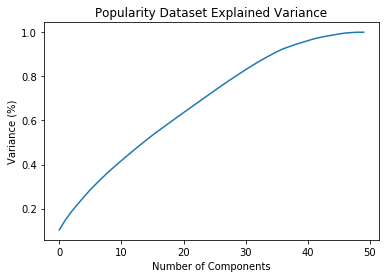

In [59]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA()
model_pca = pca.fit(x_train_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Popularity Dataset Explained Variance')
plt.show()

In [60]:
model_pca = PCA(n_components=46,svd_solver='full')

In [61]:
new_train = model_pca.fit_transform(x_train_scaled)
new_test  = model_pca.transform(x_test_scaled)

In [62]:
import pandas as pd
import pylab as pl
from sklearn.decomposition import PCA

# Dump components relations with features:
pd.DataFrame(model_pca.components_,columns=x_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                                                   'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20',
                                                                   'PC-21','PC-22','PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30',
                                                                   'PC-31','PC-32','PC-33','PC-34','PC-35','PC-36','PC-37','PC-38','PC-39','PC-40',
                                                                   'PC-41','PC-42','PC-43','PC-44','PC-45','PC-46'])

SN_region_MS  living_measure   sight_4  SN_region_EN  furnished  \
PC-1      -0.025974        0.393242  0.094063      0.033892   0.356711   
PC-2      -0.229313        0.058871  0.294437      0.224328   0.029749   
PC-3       0.133092       -0.022043  0.221605     -0.216359  -0.151401   
PC-4       0.002735        0.076107 -0.161775      0.020057   0.094767   
PC-5       0.127525        0.107915  0.073582     -0.079948  -0.277850   
PC-6      -0.462422        0.011393 -0.307512      0.412653  -0.058498   
PC-7      -0.033098       -0.080554  0.235131     -0.001761   0.182469   
PC-8       0.255693       -0.018486 -0.270641     -0.254593   0.066157   
PC-9       0.136225        0.038869 -0.125391     -0.197584  -0.022004   
PC-10      0.036209        0.007879  0.057789      0.031599   0.055211   
PC-11     -0.043688        0.007575 -0.136148      0.058076   0.046739   
PC-12      0.031690       -0.022324  0.030449     -0.140968  -0.006473   
PC-13     -0.029197        0.027841 -0.009977      0.014347  -0.073599   
PC-14     -0.112878       -0.031057  0.076483      0.119977  -0.007069   
PC-15     -0.168615       -0.029149  0.035460      0.128125  -0.017810   
PC-16      0.187599        0.073170 -0.048367     -0.125994  -0.039432   
PC-17      0.074978       -0.023422  0.003461     -0.002306   0.040473   
PC-18      0.022650        0.026630  0.022583     -0.007072   0.030158   
PC-19     -0.029579        0.036180  0.041750      0.069800  -0.011204   
PC-20      0.015149        0.024879 -0.059113     -0.028226  -0.011884   
PC-21     -0.073696       -0.006024  0.012390      0.037455  -0.029696   
PC-22      0.011506       -0.015021 -0.004985     -0.019981   0.007480   
PC-23     -0.008720       -0.023978  0.012371      0.004695  -0.009166   
PC-24      0.021102       -0.018958 -0.009856     -0.044085  -0.023974   
PC-25     -0.026984        0.019506 -0.039973     -0.039300  -0.009994   
PC-26     -0.029708        0.007928  0.010583     -0.003579  -0.038566   
PC-27      0.032762        0.058863 -0.000388      0.037537  -0.001850   
PC-28     -0.117130       -0.008700  0.071783      0.097666  -0.043309   
PC-29     -0.031109        0.039589  0.069222     -0.031512  -0.040604   
PC-30      0.046060        0.114357 -0.003825     -0.116589  -0.007615   
PC-31      0.018267        0.068006 -0.043331     -0.037018  -0.020325   
PC-32     -0.008206        0.024760 -0.017014      0.113979  -0.112352   
PC-33      0.004576       -0.063588 -0.016600     -0.001871   0.050266   
PC-34      0.058265        0.022365 -0.009525      0.066197  -0.042689   
PC-35      0.052068       -0.042277 -0.026574     -0.036398   0.106148   
PC-36     -0.055799       -0.029330 -0.021642     -0.065357   0.075942   
PC-37      0.051181       -0.129995 -0.033899     -0.095737   0.164244   
PC-38     -0.085773       -0.074132 -0.144062     -0.057411  -0.007316   
PC-39     -0.586481       -0.036857 -0.023537     -0.627040  -0.013950   
PC-40     -0.245975        0.068276 -0.281179     -0.126007  -0.013867   
PC-41      0.179862        0.004869 -0.512703      0.140521   0.031821   
PC-42      0.133624       -0.003062  0.056730      0.045183  -0.018891   
PC-43      0.049859       -0.175208  0.119592      0.145331   0.154147   
PC-44      0.007539        0.060042 -0.024286      0.001845  -0.008777   
PC-45     -0.144165        0.234341 -0.001478     -0.110584   0.025920   
PC-46     -0.013674       -0.168219 -0.329734      0.002668   0.040844   

       quality_9  quality_10  Age_of_house   coast_1  quality_13  ...  \
PC-1    0.206265    0.195377     -0.201344  0.063014    0.055699  ...   
PC-2   -0.038021    0.030317      0.342693  0.251432    0.086841  ...   
PC-3   -0.179864   -0.076206      0.107938  0.227370    0.077459  ...   
PC-4    0.020677    0.033426      0.131976 -0.188015    0.336322  ...   
PC-5   -0.294713   -0.135241     -0.143991  0.035685    0.398390  ...   
PC-6   -0.067817    0.004909      0.157853 -0.335501    0.125637  ...   
PC-7    0.315369 

In [63]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(new_train,y_train)
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)
print(lm.intercept_)
li_y_pred=lm.predict(new_test)

                   0              0
0       SN_region_MS  113119.320590
1     living_measure  103378.142235
2            sight_4   -5716.798220
3       SN_region_EN   29684.124006
4          furnished   25014.552151
5          quality_9   33539.078948
6         quality_10    5010.496957
7       Age_of_house  -47698.396993
8            coast_1  -23104.646306
9         quality_13     963.012669
10           sight_0   13888.363333
11        quality_12  -23395.217845
12         quality_8   22533.166569
13    room_bath_7.75   12763.177653
14      EW_region_EE    6773.693977
15       condition_5    3669.679299
16      Is_renovated    1273.472492
17       condition_4    8734.942119
18     room_bath_6.0     -93.750428
19      EW_region_MW   -2880.601875
20  living_measure15    2226.072971
21      EW_region_EW   -7395.471378
22    room_bath_4.75   -9037.931280
23     room_bath_8.0    -654.305183
24          ceil_2.5    2983.937948
25         quality_7    3002.471224
26    room_bath_4.25    -872

In [64]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((li_y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print('R Squared',R2)

n=new_test.shape[0]
p=new_test.shape[1] - 1



adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R squared',adj_rsquared)
lin_rmse =  np.sqrt(np.mean((li_y_pred - y_test) ** 2))
print(" Root Mean Squared Error: %.4f"
      % np.sqrt(np.mean((li_y_pred - y_test) ** 2)))

R Squared 0.7515333554477166
Adjusted R squared 0.7497955564105931
 Root Mean Squared Error: 177173.9002


# Fitting in Lasso Model

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, 
            tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
las.fit(new_train,y_train)
las_predict_pca = las.predict(new_test)

# Accuracy Score on test dataset
las_rmse_test_pca = mean_squared_error(y_test,las_predict_pca)**(0.5)
print('\nRMSE on test dataset : ', las_rmse_test_pca)

las_r2 = r2_score(y_test,las_predict_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,las_predict_pca))


RMSE on test dataset :  177173.41924248115
R square on test dataset is 0.752


In [66]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(las.coef_))], axis = 1)
print(coefficients)
print(las.intercept_)

                   0              0
0       SN_region_MS  113119.127356
1     living_measure  103377.707300
2            sight_4   -5716.276062
3       SN_region_EN   29683.530359
4          furnished   25013.944778
5          quality_9   33538.443635
6         quality_10    5009.796778
7       Age_of_house  -47697.674414
8            coast_1  -23103.889271
9         quality_13     962.207651
10           sight_0   13887.541905
11        quality_12  -23394.381935
12         quality_8   22532.315403
13    room_bath_7.75   12762.316658
14      EW_region_EE    6772.801005
15       condition_5    3668.774582
16      Is_renovated    1272.512983
17       condition_4    8733.972253
18     room_bath_6.0     -92.772549
19      EW_region_MW   -2879.619878
20  living_measure15    2225.079443
21      EW_region_EW   -7394.476407
22    room_bath_4.75   -9036.933905
23     room_bath_8.0    -653.304101
24          ceil_2.5    2982.936211
25         quality_7    3001.463298
26    room_bath_4.25    -871

# Fitting in Ridge 

In [67]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=2.0, fit_intercept=True,normalize=False, copy_X=True, max_iter=None, tol=0.001, 
 solver='auto', random_state=None)
rid.fit(new_train,y_train)
rid_predict_pca = rid.predict(new_test)

# Accuracy Score on test dataset
rid_rmse_test_pca = mean_squared_error(y_test,rid_predict_pca)**(0.5)
print('\nRMSE on test dataset : ', rid_rmse_test_pca)

rid_r2 =r2_score(y_test,rid_predict_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,rid_predict_pca))


RMSE on test dataset :  177172.68268554276
R square on test dataset is 0.752


In [68]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(rid.coef_))], axis = 1)
print(coefficients)
print(rid.intercept_)

                   0              0
0       SN_region_MS  113116.429328
1     living_measure  103372.195122
2            sight_4   -5716.403396
3       SN_region_EN   29681.793254
4          furnished   25012.542635
5          quality_9   33536.260693
6         quality_10    5010.032947
7       Age_of_house  -47693.838452
8            coast_1  -23102.332909
9         quality_13     962.910135
10           sight_0   13886.854463
11        quality_12  -23392.631320
12         quality_8   22530.629890
13    room_bath_7.75   12761.724243
14      EW_region_EE    6772.893977
15       condition_5    3669.240195
16      Is_renovated    1273.310884
17       condition_4    8733.821664
18     room_bath_6.0     -93.738303
19      EW_region_MW   -2880.227752
20  living_measure15    2225.780461
21      EW_region_EW   -7394.498189
22    room_bath_4.75   -9036.739081
23     room_bath_8.0    -654.218552
24          ceil_2.5    2983.542614
25         quality_7    3002.070978
26    room_bath_4.25    -872

# Fitting in Decision Tree Regressor

In [69]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(new_train,y_train)


# predict the target on the new train dataset
dtree_pca_train_pred = dtree.predict(new_train)

# predict the target on the new test dataset
dtree_predict_test_pca = dtree.predict(new_test)

# Accuracy Score on test dataset
dtree_rmse_test_pca = mean_squared_error(y_test,dtree_predict_test_pca)**(0.5)
print('\nRMSE on test dataset : ', dtree_rmse_test_pca)

dtree_r2 =r2_score(y_test,dtree_predict_test_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,dtree_predict_test_pca))


RMSE on test dataset :  206100.55739497402
R square on test dataset is 0.664


# Fitting in Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(new_train,y_train)


# predict the target on the new test dataset
rf_reg_predict_test_pca = rf_reg.predict(new_test)

# Accuracy Score on test dataset
rf_reg_rmse_test_pca = mean_squared_error(y_test,rf_reg_predict_test_pca)**(0.5)
print('RMSE on test dataset : ', rf_reg_rmse_test_pca)

rf_reg_r2 = r2_score(y_test,rf_reg_predict_test_pca)
print('R square on test dataset is %1.3f' % r2_score(y_test,rf_reg_predict_test_pca))

RMSE on test dataset :  157411.1883711125
R square on test dataset is 0.804


In [79]:
rf_reg.score(new_test, y_test)

0.8038719099406763

# Fitting in Gradient Boosting Regressor

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                                    learning_rate=0.01,
                                                    max_depth=4,
                                                    max_features='sqrt',
                                                    min_samples_leaf=15,
                                                    min_samples_split=10,
                                                    loss='huber',
                                                    random_state=100
                   )

gbr.fit(new_train,y_train)



# predict the target on the new test dataset
gbr_predict_test_pca = gbr.predict(new_test)

# Accuracy Score on test dataset
gbr_rmse_test_pca = mean_squared_error(y_test,gbr_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', gbr_rmse_test_pca)

gbr_r2 = r2_score(y_test, gbr_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, gbr_predict_test_pca))


RMSE on new test dataset :  155645.2066991956
R square is 0.808


# Fitting in Light Gradient Boost Regressor

In [73]:
# Light Gradient Boosting Regressor
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(n_jobs=-1)

lightgbm.fit(new_train,y_train)



# predict the target on the new test dataset
lgbm_predict_test_pca = lightgbm.predict(new_test)

# Accuracy Score on test dataset
lgbm_rmse_test_pca = mean_squared_error(y_test,lgbm_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', lgbm_rmse_test_pca)

lgbm_r2 =r2_score(y_test, lgbm_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, lgbm_predict_test_pca))


RMSE on new test dataset :  155654.6048781735
R square is 0.808


# Fitting in XGB Regressor

In [74]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                                            n_estimators=6000,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.7,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)

xgboost.fit(new_train,y_train)


# predict the target on the new test dataset
xgb_predict_test_pca = xgboost.predict(new_test)

# Accuracy Score on test dataset
xgb_rmse_test_pca = mean_squared_error(y_test,xgb_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', xgb_rmse_test_pca)

xgb_r2 = r2_score(y_test, xgb_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, xgb_predict_test_pca))

[20:39:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kishore\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



RMSE on new test dataset :  151468.3129740528
R square is 0.818


In [77]:
# Run all
output = pd.DataFrame({'Regressors With PCA':['Linear Regression','LASSO','Ridge','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor','Light GBM Regressor', 'XGB Regressor'],
                      'Root Mean Squared Error': [lin_rmse,las_rmse_test_pca,rid_rmse_test_pca,dtree_rmse_test_pca,rf_reg_rmse_test_pca,gbr_rmse_test_pca,lgbm_rmse_test_pca,xgb_rmse_test_pca],
                      'R2 Score':[R2,las_r2,rid_r2,dtree_r2,rf_reg_r2,gbr_r2,lgbm_r2,xgb_r2]
                      })
output

Regressors With PCA  Root Mean Squared Error  R2 Score
0            Linear Regression            177173.900209  0.751533
1                        LASSO            177173.419242  0.751535
2                        Ridge            177172.682686  0.751537
3      Decision Tree Regressor            206100.557395  0.663777
4      Random Forest Regressor            157411.188371  0.803872
5  Gradient Boosting Regressor            155645.206699  0.808248
6          Light GBM Regressor            155654.604878  0.808225
7                XGB Regressor            151468.312974  0.818402

#### XG Boost gives the best accuracy of 81% among all 